# Data Science article recommender

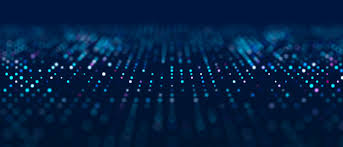

##  <a href='#1'>1. Introduction</a>  
##  <a href='#2'>2. Exploratory Data Analysis (EDA)</a>
##  <a href='#3'>3. Data Visualization</a>
##  <a href='#4'>4. Training the model</a>

### <a id='1'>1. Introduction</a>

This project aims to provide relevant articles for users interested in specific data science topics using Natural Language Processing (NLP) techniques with TensorFlow.

It builds a model that suggests a series of articles depending on the user input.

This project combines all the necessary skills for dealing with data:
* Exploratory Data Analysis
* Building Models
* Deploying output to production
* Making it accessible by using a public website

### If you need to contact me, don't be afraid:
* Email: **leonardo.sanchezsoler@gmail.com**
* Linkedin: **https://www.linkedin.com/in/leonardosanchezsoler/**

### Check my repo in Github: **https://github.com/leosanchezsoler**

### <a id='2'>2. Exploratory Data Analysis (EDA)</a>

In [1]:
### Import the necessary libraries ###

# READING FILES
import json # Module for reading json files

# EDA
import pandas as pd # High-performance module for data analysis
import numpy as np # Fundamental package for linear algebra
from src.utils.mining_data_tb import df_info, remove_cols, apply_function_to_cols # Self-made functions

# TEXT FORMATTING 
from ast import literal_eval # convert 'stringfield' lists to usable structure
import re # regex for text formatting and cleaning
from src.utils.text_formatting_tb import get_names, get_link, get_tag, apply_clean_text

# DATA VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# DATA PREPROCESSING AND NLP
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import Model, Sequential, layers
import nltk
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# SAVING FILES 
from src.utils.folders_tb import save_freq_words

### Load the dataset

In [2]:
# Assign the url to a variable
df = pd.read_json('https://raw.githubusercontent.com/NeelShah18/arxivData/master/arxivData.json')

# Get DataFrame info to see how the data is structured
df_info(df=df)

####
DATAFRAME INFO
####

Number of rows: 41000
Number of columns: 9

#### DATAFRAME COLUMNS ####
 Index(['author', 'day', 'id', 'link', 'month', 'summary', 'tag', 'title',
       'year'],
      dtype='object') 

### DATAFRAME COLUMN TYPES ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   41000 non-null  object
 1   day      41000 non-null  int64 
 2   id       41000 non-null  object
 3   link     41000 non-null  object
 4   month    41000 non-null  int64 
 5   summary  41000 non-null  object
 6   tag      41000 non-null  object
 7   title    41000 non-null  object
 8   year     41000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.8+ MB

 None

### TOTAL NaN VALUES ###
 author     0
day        0
id         0
link       0
month      0
summary    0
tag        0
title      0
year       0
dtype: int64


In [3]:
# Use df.describe() to show how the data is distributed and tendencies in the columns
df.describe()

,day,month,year
count,41000.000000,41000.000000,41000.000000
mean,15.833293,6.547488,2014.484073
std,8.699371,3.525254,3.685414
min,1.000000,1.000000,1993.000000
25%,8.000000,3.000000,2013.000000
50%,16.000000,6.000000,2016.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [4]:
# See how data is presented
df.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [5]:
# Remove unnecessary columns
cols_list = ['day','id', 'month']
remove_cols(df=df, cols= cols_list)

"The following columns have been removed from your DataFrame: ['day', 'id', 'month']"

### Some of the columns seem to be lists at first sight, but after inspecting them, they behave as strings, so we will have to transform them

In [6]:
# Select the desired columns that will be transdormed
print('Before transforming items:', 'type of author column:', type(df.author[0]))
features = ['author', 'link', 'tag']

apply_function_to_cols(df=df, cols=features, function=literal_eval)

print('Items transformed:', 'type of author column:', type(df.author[0]))

Before transforming items: type of author column: <class 'str'>
Items transformed: type of author column: <class 'list'>


In [7]:
# Use a function that scrapes through html structures

# For names
df['author'] = df['author'].apply(get_names)

# For links
df['link'] = df['link'].apply(get_link)

#For tags
df['tag'] = df['tag'].apply(get_tag)

# Use regex for cleaning the text
cols_to_format = ['title', 'summary']
apply_clean_text(df=df, cols=cols_to_format)

"['title', 'summary'] have been cleaned and formatted"

## Now, our DataFrame is structured the way we wanted

In [8]:
df.head()

,author,link,summary,tag,title,year,clean_title,clean_summary
0,"[Ahmed Osman, Wojciech Samek]",http://arxiv.org/abs/1802.00209v1,We propose an architecture for VQA which utili...,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units for visual ques...,we propose an architecture for vqa which utili...
1,"[Ji Young Lee, Franck Dernoncourt]",http://arxiv.org/abs/1603.03827v1,Recent approaches based on artificial neural n...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Sequential Short-Text Classification with Recu...,2016,sequential short text classification with recu...,recent approaches based on artificial neural n...
2,"[Iulian Vlad Serban, Tim Klinger, Gerald Tesauro]",http://arxiv.org/abs/1606.00776v2,We introduce the multiresolution recurrent neu...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks an a...,we introduce the multiresolution recurrent neu...
3,"[Sebastian Ruder, Joachim Bingel, Isabelle Aug...",http://arxiv.org/abs/1705.08142v2,Multi-task learning is motivated by the observ...,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",Learning what to share between loosely related...,2017,learning what to share between loosely related...,multi task learning is motivated by the observ...
4,"[Iulian V. Serban, Chinnadhurai Sankar, Mathie...",http://arxiv.org/abs/1709.02349v2,We present MILABOT: a deep reinforcement learn...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",A Deep Reinforcement Learning Chatbot,2017,a deep reinforcement learning chatbot,we present milabot a deep reinforcement learni...


### Once the DataFrame is formatted, save it

In [9]:
# Save the dataframe
result = df.to_json('data/data.json', orient='records', indent=4)

### <a id='2'>3. Data Visualization</a>
#### In this project, **`words`** are our main source of information, so our visualizations need to reflect the impact they will have on the model that will be trained

- We will create a new column called **soup** that mixes both the title and the summary of the dataframe, the columns with more relevant text in our dataset

In [10]:
df['soup'] = df['clean_title'] + df['clean_summary']
df.soup.head()

0    dual recurrent attention units for visual ques...
1    sequential short text classification with recu...
2    multiresolution recurrent neural networks an a...
3    learning what to share between loosely related...
4    a deep reinforcement learning chatbotwe presen...
Name: soup, dtype: object

In [11]:
# Tokenize and save the most relevant words in order to create a wordcloud with them
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(df.soup)

dictionary = tokenizer.word_index

In [12]:
# Save the most frequent words in a json file
save_freq_words(df=df, col='soup')

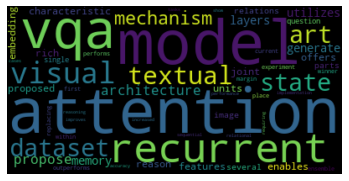

In [13]:
## Let's learn how to use wordcloud

text = df.clean_summary[0]

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
text_title = ''.join(titles for titles in df.clean_title)
text_summary = ''.join(summaries for summaries in df.clean_summary)
text_soup = ''.join(soups for soups in df.soup)
print('There are {} words in the title column'.format(len(text_title)))
print('\nThere are {} words in the summary column'.format(len(text_summary)))
print('\nThere are {} words in the soup column'.format(len(text_soup)))

There are 2785112 words in the title column

There are 41047780 words in the summary column

There are 43832892 words in the soup column


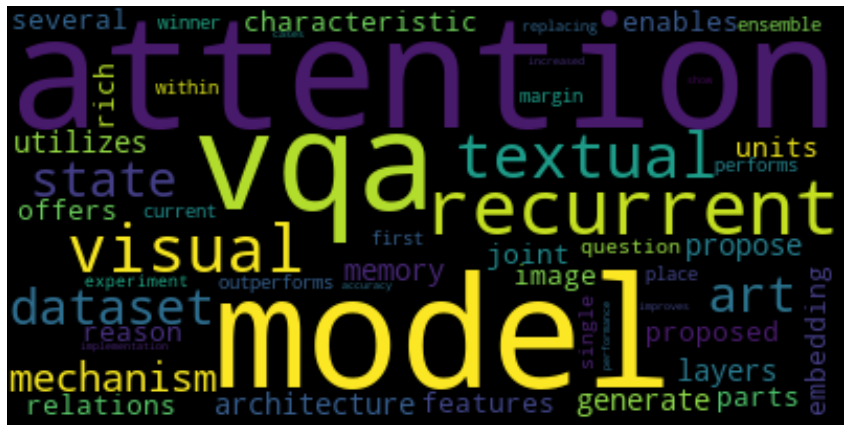

In [15]:
# Plot the 50 most frequent words
wordcloud = WordCloud(max_words=50).generate(text)
plt.figure(figsize=(15,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

filename = 'test1'
path_png = 'documentation/images/static/' + filename + '.png'
wordcloud.to_file(path_png)

### <a id='4'>4. Training the Model</a>

### Define both the features and target for the model
The tag is going to be the target label, so the model will have to predict the labels related to the text input

In [38]:
# X --> Feature
X = df['soup']

# y --> Target
y = df['tag']

# Check shapes
print('X shape:', X.shape)
print('y shape:', y.shape)

# Use np.stack to give the right dimension
X = np.stack(np.array(df['soup']))
y = np.array(df['tag'])

# Check shapes now
print('\nX shape after np.stack():', X.shape)


X shape: (41000,)
y shape: (41000,)

X shape after np.stack(): (41000,)


array([list(['cs.AI', 'cs.CL', 'cs.CV', 'cs.NE', 'stat.ML']),
       list(['cs.CL', 'cs.AI', 'cs.LG', 'cs.NE', 'stat.ML']),
       list(['cs.CL', 'cs.AI', 'cs.LG', 'cs.NE', 'stat.ML']), ...,
       list(['math.NA', 'cs.LG', '62H30, 91C20, 94A08']),
       list(['cs.SC', 'cs.LG', '68W30, 68T05, O3C10', 'I.2.6']),
       list(['cs.SD', 'cs.LG'])], dtype=object)

In [37]:
# Set the maximum vocabulary size
vocab_size = 10000
sequence_lenght = 100

# Vectorize the text
vectorize_layer = TextVectorization(max_tokens=vocab_size,
                                    output_mode='int',
                                    output_sequence_length=sequence_lenght)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [26]:
# Set the max size of the array for each word
embedding_dim = 16

# Create a model in tensorflow
model = Sequential()
model.add(vectorize_layer)
model.add(layers.Embedding(vocab_size, embedding_dim, name='embedding'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1))

### Compile and train the model
Use tensorflow to visualize the metrics including loss and accuracy. Create a `tf.keras.callbacks.TensorBoard`


In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

In [28]:
model.compile(optimizer='adam',
                loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics = ['accuracy'])

In [34]:
history = model.fit(X, y,
                    epochs=200,
                    callbacks = [tensorboard_callback])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).